### Importing packages

In [54]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

plt.style.context('seaborn');

import warnings
warnings.filterwarnings('ignore')

### Downloading dataset

In [43]:
data = pd.read_excel('vitrina_clients_vkr.xlsx')

In [146]:
df = data.copy()

In [147]:
df.set_index('client_id', inplace=True)

### Data type conversion

In [148]:
for col in df.columns: 
    if type(df[col][0]) == np.float64:
        df[col] = df[col].astype('float16')
    elif type(df[col][0]) == np.int64:
        df[col] = df[col].astype('int16')
    elif type(df[col][0]) == np.object:
        df[col] = df[col].astype('category')
    else:
        pass

### Basic stats

In [149]:
df.describe()

,DistinctCountOrders,AverageOrderSum,AvgBill,AverageNumItemsInOrder,RevenueClient,TotalNumberItemsOrdered,AverageMarginOrder,cnt_purchased_orders,AvgOrderSumPurchased,AvgNumItemsOrderPurchased,...,КГТ,ОДЕЖДА,ППКП,CENTRAL,FAR EAST,NORTH,PRIVOLZIE,SIBERIA,SOUTHERN,URAL
count,194005.000000,194005.0,194005.0,194005.000000,194005.0,194005.000000,193541.0,194005.000000,104284.0,104284.0,...,194005.000000,194005.000000,194005.000000,194005.0,194005.000000,194005.000000,194005.000000,194005.000000,194005.000000,194005.000000
mean,1.770893,NaN,NaN,NaN,NaN,9.537326,NaN,0.779836,NaN,NaN,...,0.189209,0.201050,0.311523,NaN,0.004765,0.091492,0.139038,0.054596,0.056915,0.053802
std,1.974436,NaN,NaN,NaN,NaN,27.380757,NaN,1.173811,NaN,NaN,...,0.372070,0.364502,0.424805,0.0,0.068726,0.288330,0.345703,0.227051,0.231445,0.225464
min,1.000000,1.0,1.0,0.166626,1.0,1.000000,-inf,0.000000,1.0,1.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1303.0,1085.0,1.000000,1308.0,1.000000,153.0,0.000000,1190.0,1.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2320.0,1999.0,2.000000,2772.0,2.000000,411.0,1.000000,2100.0,2.0,...,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,4084.0,3610.0,4.000000,6016.0,7.000000,992.5,1.000000,3564.0,4.0,...,0.047607,0.199951,0.799805,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,115.000000,inf,inf,559.000000,inf,1363.000000,52960.0,80.000000,inf,559.0,...,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [150]:
print("Sum missing of values: ", df.isna().sum())

Sum missing of values:  DistinctCountOrders              0
AverageOrderSum                  0
AvgBill                          0
AverageNumItemsInOrder           0
RevenueClient                    0
TotalNumberItemsOrdered          0
AverageMarginOrder             464
cnt_purchased_orders             0
AvgOrderSumPurchased         89721
AvgNumItemsOrderPurchased    89721
RevenueClientPurchased       89721
PurchasedItems               89721
AvgMarginPurchased           89982
SharePurchasedOrders             0
ДЕТСКОЕ ПИТАНИЕ                  0
ЖЕНСКИЕ ШТУЧКИ                   0
ИГРУШКИ                          0
КАНЦТОВАРЫ, КНИГИ, ДИСКИ         0
КОСМЕТИКА/ГИГИЕНА                0
КРУПНОГАБАРИТНЫЙ ТОВАР           0
ОБУВЬ                            0
ПОДГУЗНИКИ                       0
СОПУТСТВУЮЩИЕ ТОВАРЫ             0
ТЕКСТИЛЬ, ТРИКОТАЖ               0
ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА        0
ТОВАРЫ ДЛЯ ЖИВОТНЫХ              0
ТОВАРЫ ДЛЯ КОРМЛЕНИЯ             0
ИГРУШКИ.1                      

In [151]:
print("Number of duplicates: ", df.duplicated().sum())

Number of duplicates:  16662


In [152]:
df.drop_duplicates(inplace=True)

In [153]:
print("Number of duplicates:: ", df.duplicated().sum())

Number of duplicates::  0


In [154]:
print('Num of objects ', df.select_dtypes(include=['object']).shape[1])
print('Num of categorical ', df.select_dtypes(include=['category']).shape[1])
print('Num of numerical ', df.select_dtypes(include=['number']).shape[1])

Num of objects  0
Num of categorical  0
Num of numerical  39


In [155]:
#stats for numerical data
df.describe(include=['number']).T

,count,mean,std,min,25%,50%,75%,max
DistinctCountOrders,177343.0,1.842723,2.050362,1.000000e+00,1.000,1.000000,2.000000,115.0
AverageOrderSum,177343.0,NaN,NaN,1.000000e+00,1301.000,2322.000000,4092.000000,inf
AvgBill,177343.0,NaN,NaN,1.000000e+00,1069.000,1986.000000,3594.000000,inf
AverageNumItemsInOrder,177343.0,NaN,NaN,1.666260e-01,1.000,2.000000,4.667969,559.0
RevenueClient,177343.0,NaN,NaN,1.000000e+00,1338.000,2850.000000,6236.000000,inf
TotalNumberItemsOrdered,177343.0,10.328522,28.510158,1.000000e+00,1.000,3.000000,8.000000,1363.0
AverageMarginOrder,176892.0,NaN,NaN,-inf,159.750,415.500000,978.000000,52960.0
cnt_purchased_orders,177343.0,0.795763,1.217202,0.000000e+00,0.000,1.000000,1.000000,80.0
AvgOrderSumPurchased,94150.0,NaN,NaN,1.000000e+00,1177.000,2094.000000,3524.000000,inf
AvgNumItemsOrderPurchased,94150.0,NaN,NaN,1.000000e+00,1.000,2.000000,4.000000,559.0


### Removing outliers

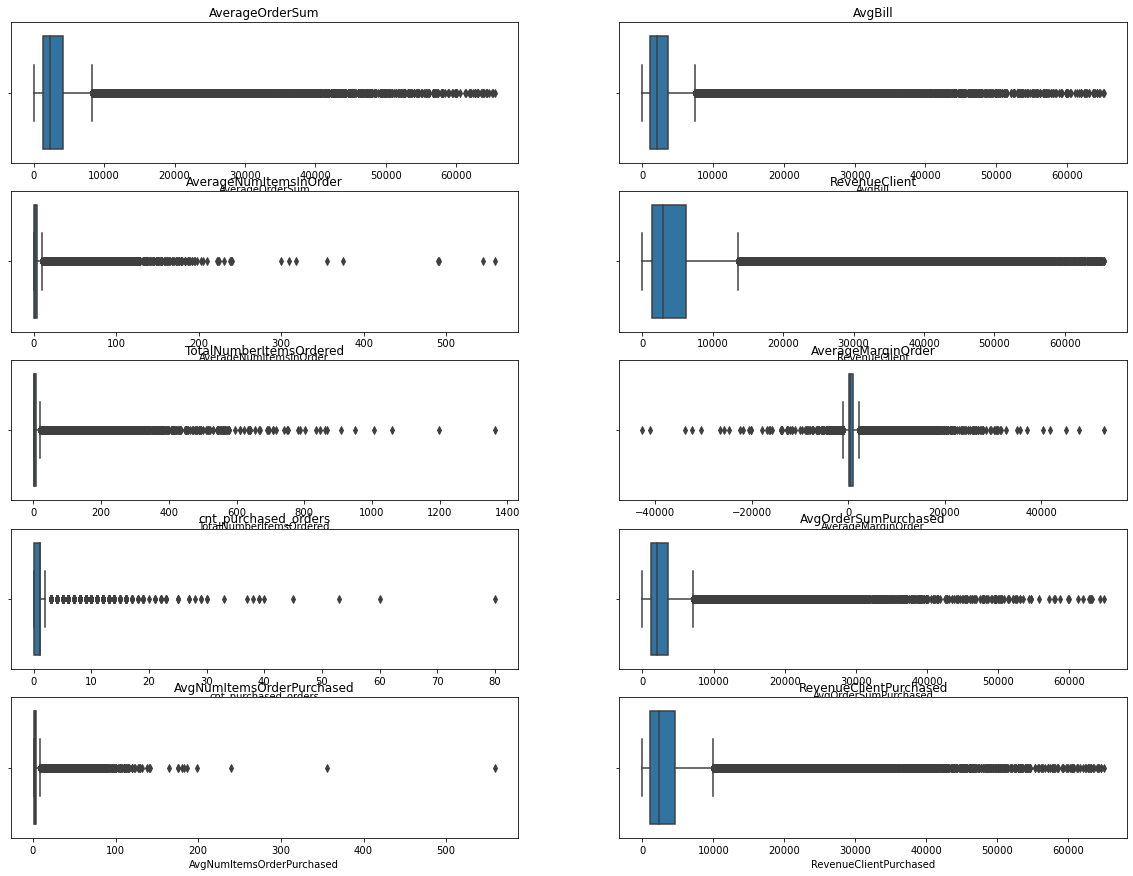

In [156]:
#checking for outliers
plt.figure(figsize=(20, 15))
for i, col in enumerate(df.select_dtypes(include='number').columns):
    if i>0 and i<11:
        plt.subplot(5, 2, i)
        sns.boxplot(x=df[col])
        plt.title(col)

In [157]:
#replacing emissions with bounds
for col in df.select_dtypes(include='number').columns:
    iqr = df[col].quantile(0.75) - df[col].quantile(0.25) #interquartile range
    lower_bound = df[col].quantile(0.25) - (1.5 * iqr)
    upper_bound = df[col].quantile(0.75) + (1.5 * iqr)

    print('Share of outliers: {:.2%}'.format(df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0] / df.shape[0]))
    df.loc[df[col] < lower_bound, col] = lower_bound 
    df.loc[df[col] > upper_bound, col] = upper_bound 

Share of outliers: 9.69%
Share of outliers: 8.98%
Share of outliers: 9.65%
Share of outliers: 9.79%
Share of outliers: 9.73%
Share of outliers: 11.88%
Share of outliers: 10.26%
Share of outliers: 5.57%
Share of outliers: 5.12%
Share of outliers: 4.95%
Share of outliers: 5.12%
Share of outliers: 5.72%
Share of outliers: 5.94%
Share of outliers: 0.00%
Share of outliers: 15.57%
Share of outliers: 0.49%
Share of outliers: 0.00%
Share of outliers: 7.31%
Share of outliers: 14.48%
Share of outliers: 23.71%
Share of outliers: 11.13%
Share of outliers: 24.57%
Share of outliers: 0.94%
Share of outliers: 23.92%
Share of outliers: 0.09%
Share of outliers: 2.00%
Share of outliers: 14.61%
Share of outliers: 0.00%
Share of outliers: 2.50%
Share of outliers: 23.71%
Share of outliers: 17.20%
Share of outliers: 0.00%
Share of outliers: 0.00%
Share of outliers: 0.52%
Share of outliers: 9.23%
Share of outliers: 14.05%
Share of outliers: 5.69%
Share of outliers: 5.96%
Share of outliers: 5.60%


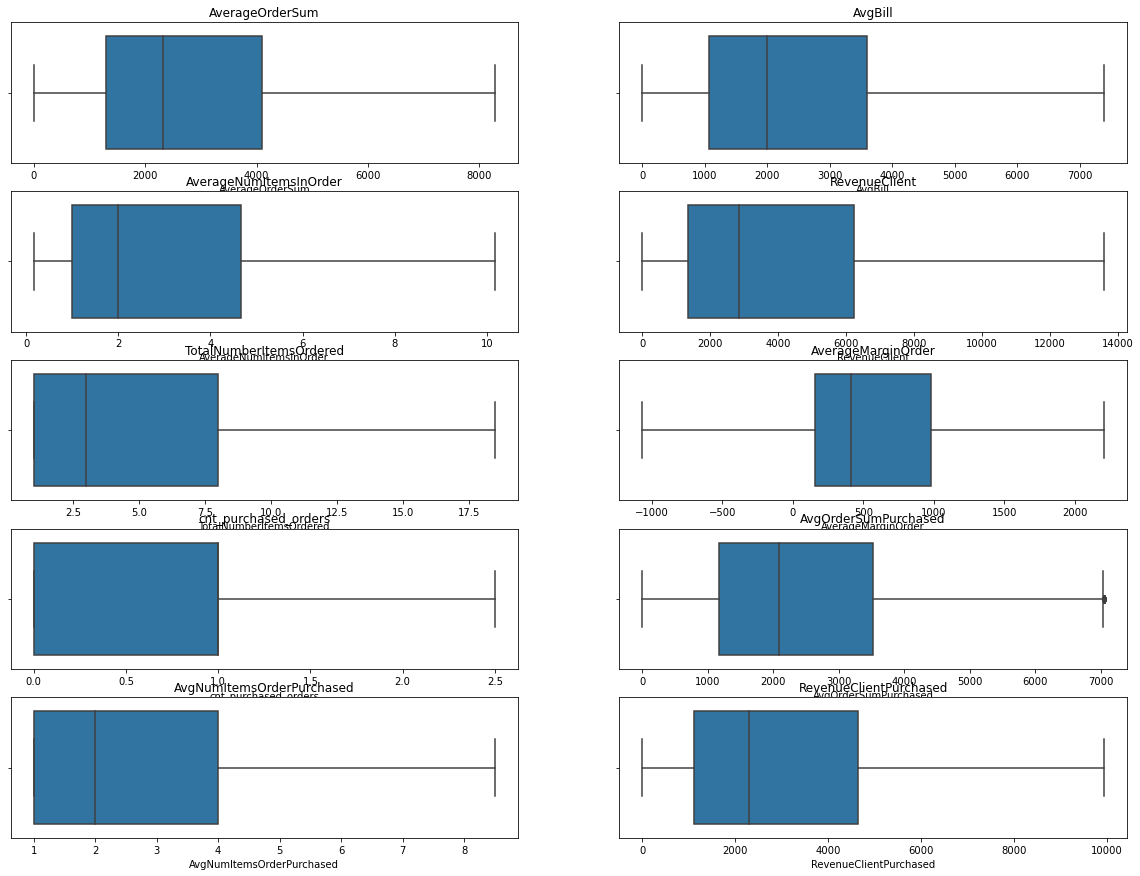

In [158]:
#checking for outliers
plt.figure(figsize=(20, 15))
for i, col in enumerate(df.select_dtypes(include='number').columns):
    if i>0 and i<11:
        plt.subplot(5, 2, i)
        sns.boxplot(x=df[col])
        plt.title(col)

array([[<AxesSubplot:title={'center':'DistinctCountOrders'}>,
        <AxesSubplot:title={'center':'AverageOrderSum'}>,
        <AxesSubplot:title={'center':'AvgBill'}>,
        <AxesSubplot:title={'center':'AverageNumItemsInOrder'}>,
        <AxesSubplot:title={'center':'RevenueClient'}>,
        <AxesSubplot:title={'center':'TotalNumberItemsOrdered'}>],
       [<AxesSubplot:title={'center':'AverageMarginOrder'}>,
        <AxesSubplot:title={'center':'cnt_purchased_orders'}>,
        <AxesSubplot:title={'center':'AvgOrderSumPurchased'}>,
        <AxesSubplot:title={'center':'AvgNumItemsOrderPurchased'}>,
        <AxesSubplot:title={'center':'RevenueClientPurchased'}>,
        <AxesSubplot:title={'center':'PurchasedItems'}>],
       [<AxesSubplot:title={'center':'AvgMarginPurchased'}>,
        <AxesSubplot:title={'center':'SharePurchasedOrders'}>,
        <AxesSubplot:title={'center':'ДЕТСКОЕ ПИТАНИЕ'}>,
        <AxesSubplot:title={'center':'ЖЕНСКИЕ ШТУЧКИ'}>,
        <AxesSubplot:titl

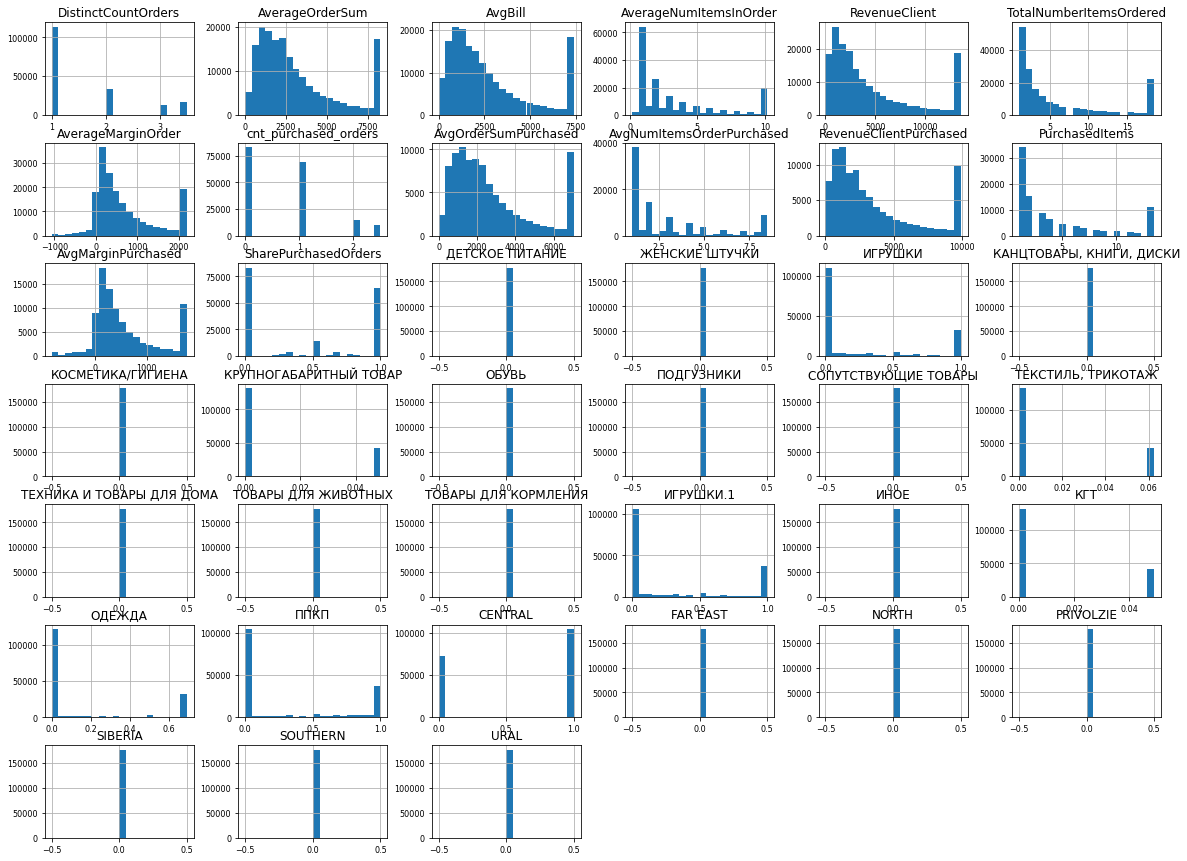

In [159]:
#check the distribution after replacing the outliers
df.select_dtypes(include='number').hist(figsize=(20, 15), bins=20, xlabelsize=8, ylabelsize=8) 

### Removing correlation

<AxesSubplot:>

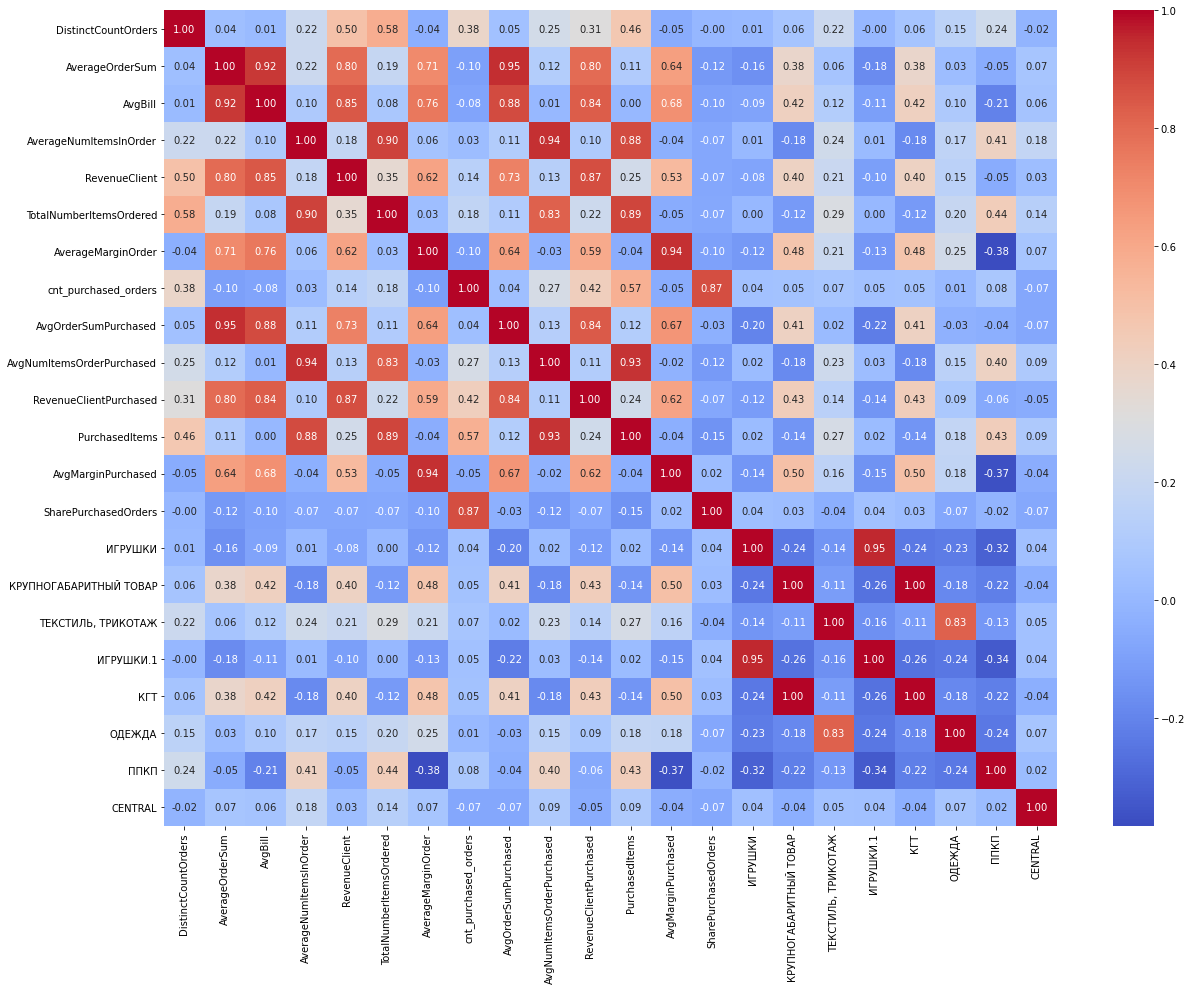

In [160]:
#check the correlation between the features
# Not all variables have a normal distribution, so let's use Spearman correlation, which does not require this condition
plt.figure(figsize=(20, 15))

#select only numeric with more than 2 unique values
df_corr = df[[col for col in df.select_dtypes(include='number').columns if df[col].nunique() > 2]]

sns.heatmap(df_corr.corr(method='spearman'), annot=True, fmt='.2f', cmap='coolwarm')

#### Removing columns that have high correlation coefficient

In [161]:
df = df.drop(['AverageOrderSum', 'AvgBill', 'AverageMarginOrder', 'TotalNumberItemsOrdered', 'TotalNumberItemsOrdered'],
             axis=1)